# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [21]:
# Librerias necesarias
#install.packages("kohonen")

In [22]:
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)
head(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

,WATER,PROTEIN,FAT,LACTOSE,ASH
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71


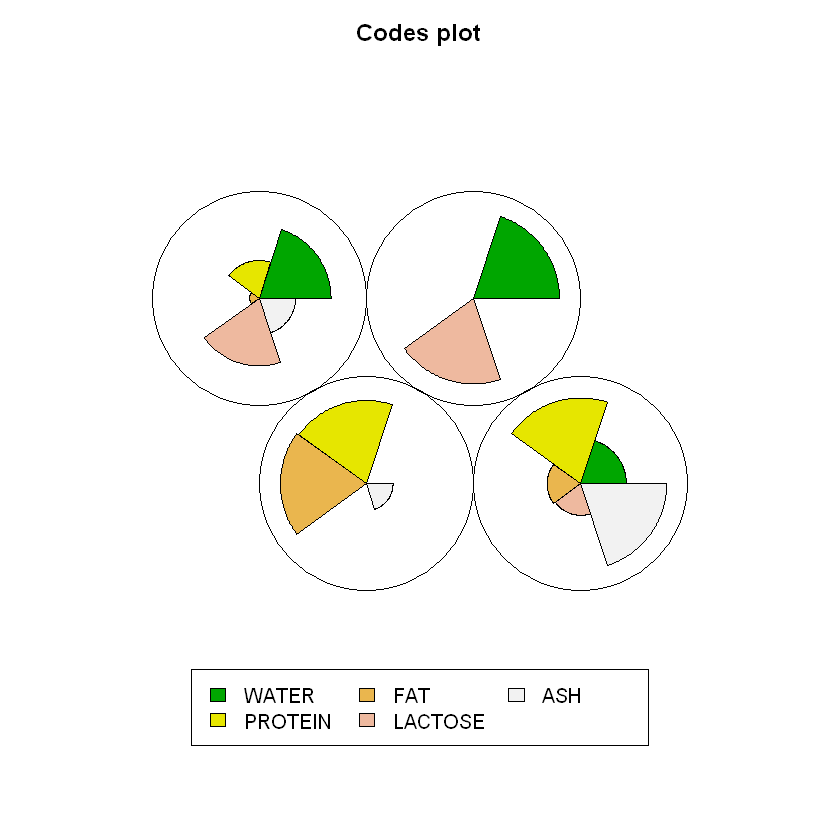

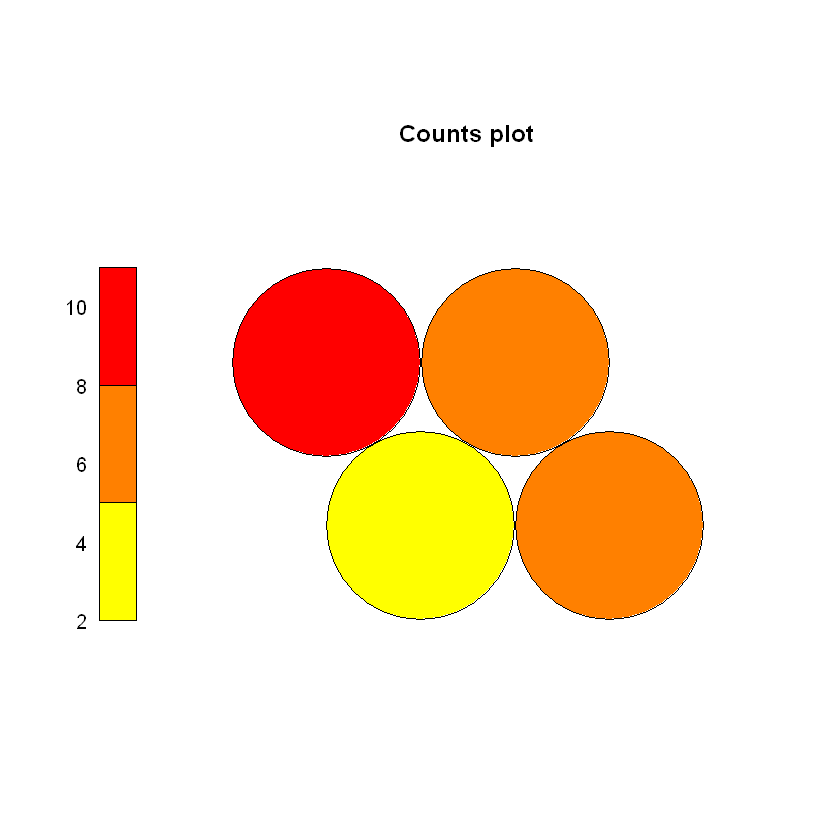

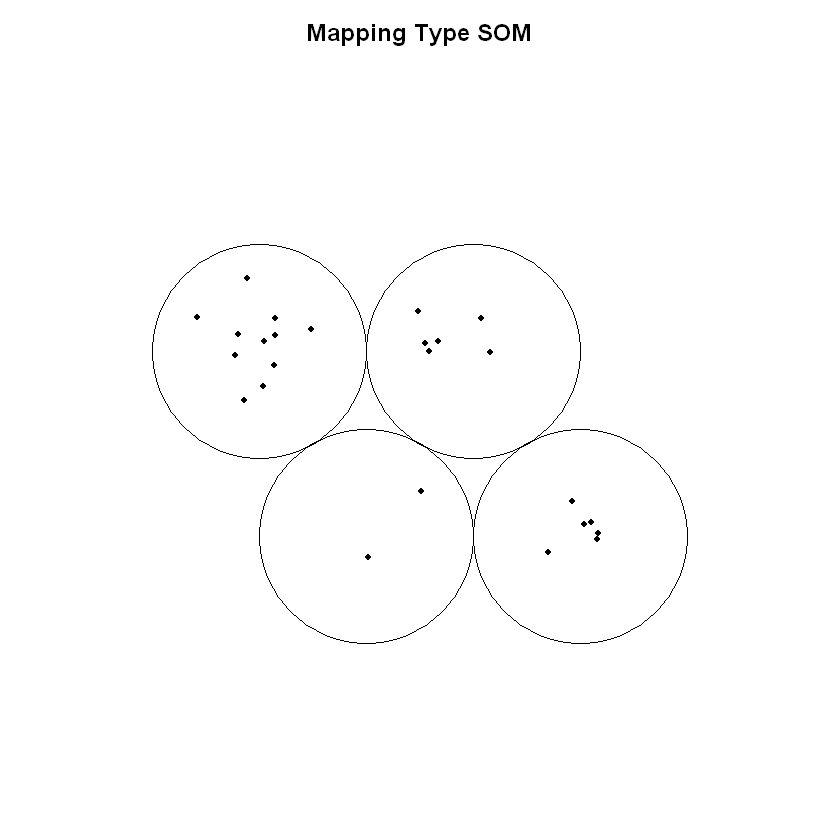

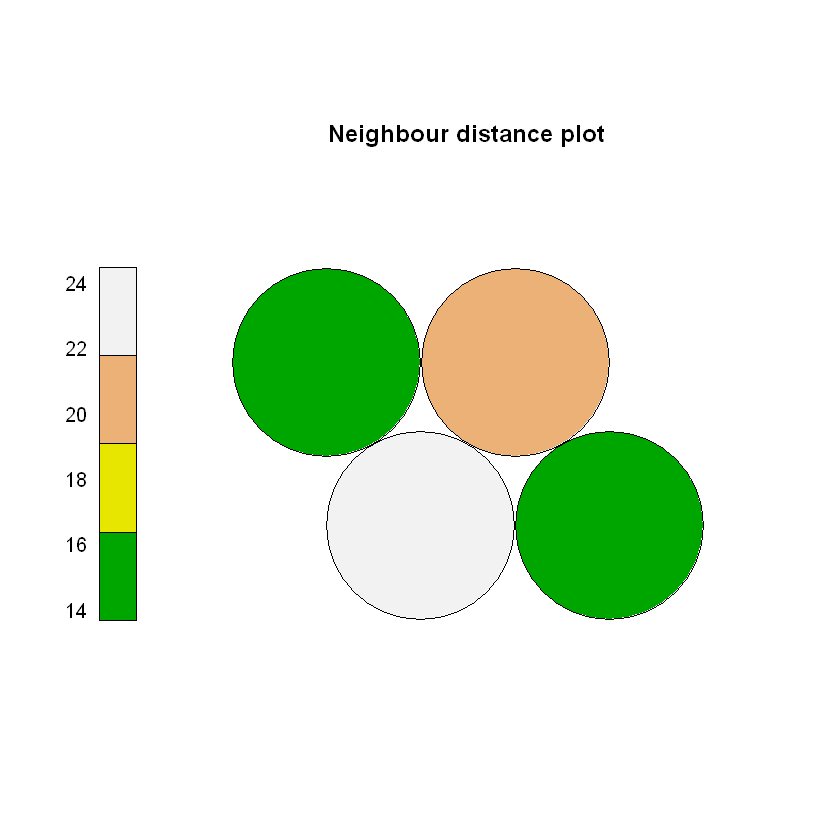

In [23]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


Ejercicio 1: 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

In [24]:
#       1.a

# referencia: https://www.rdocumentation.org/packages/kohonen/versions/2.0.19/topics/som
# ultimo ppt

# ¿Cómo funciona el método som? Dar parámetros de entrada y salida. ¿Qué indican los gráficos?
# La función SOM corresponde a Self- Organising Maps
# Utiliza una red neuronal que espera una entrada con datos multidimensionales (algoritmo de kohonen)
# Para el featured map utiliza distancia euclidiana entre nodos
# Teniendo como salida un featured map de menor dimensión (en este caso, y generalmente, 2D)

# ENTRADAS:

# data -> Matriz de datos (escalada), siendo cada fila un elemento distinto
# grid -> De la mano con la función - somgrid - La grilla, para el tamaño u otras especificaciones como forma
# rlen -> Número de veces que "data" se presenta a la network, con un valor muy bajo podría perderse precisión en los datos, default 100
# alpha -> Tasa de aprendizaje, disminuye linealmente entre 2 valores dados, default c(0.05, 0.1)
# radius -> El radio de la vecindad o radio de activación de los datos, default quantile(nhbrdist, 0.67) * c(1, -1)
# init -> Datos iniciales para la red neuronal, default -> valores aleatorios de los datos dados
# toroidal -> si es VERDADERO, los bordes del mapa se unen.
# keep.data -> guarda la data en objecto.
# names(sommap)


#SALIDAS:

# Un objeto de clase kohonen con componentes:
# data <- matriz de datos, solo si keep.data = True
# grid <- objeto de tipo "somgrid", da la estructura del grid, posiciones y forma
# codes <- da una matriz con los pesos de cada nodo del feature map (ver gráfico 1)
# changes <- Vector de desviacion de promedios de "codes" por cada iteración hecha (se relaciona con rlen) es importante si se quiere saber convergencia
# unit.classif <- nodos activados observación, solo se retorna si keep.data == TRUE
# distances <- distancia de observación al nodo activado (unit.classif), solo se retorna si keep.data == TRUE  (las distancias suelen bajar si rlen es un numero más grande)
# toroidal <- si se usa o no






# ¿ Qué son los gráficos?
# Primero existen distintos tipos de graficos de 'som', definidos como type = "codes", "changes", "counts","dist.neighbours", "mapping", "property", "quality"

# Los gráficos desplegados muestran:
# 1. Los pesos de cada variable, siendo representados de manera más grande los números que, valga la redundancia, son más grandes. Este valor se saca de "codes" 
# 2. El número de veces observaciones por nodo, este dato se relaciona con el valor de rlen, si rlen es muy bajo las observaciones pueden bajar
# 3. Donde se ubican los datos observados en cada nodo (es una forma más precisa que el gráfico 2)
# 4. Muestra la suma de las distancias a todos los vecinos inmediatos, si el número es pequeño y hay hartos datos (observaciones) se espera una concentración de estos


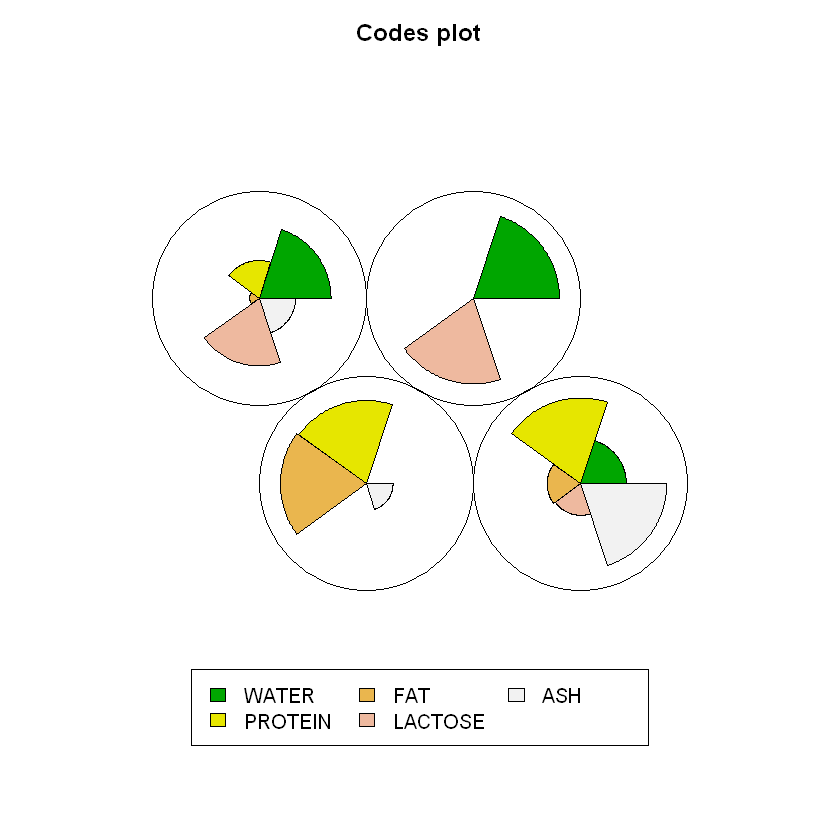

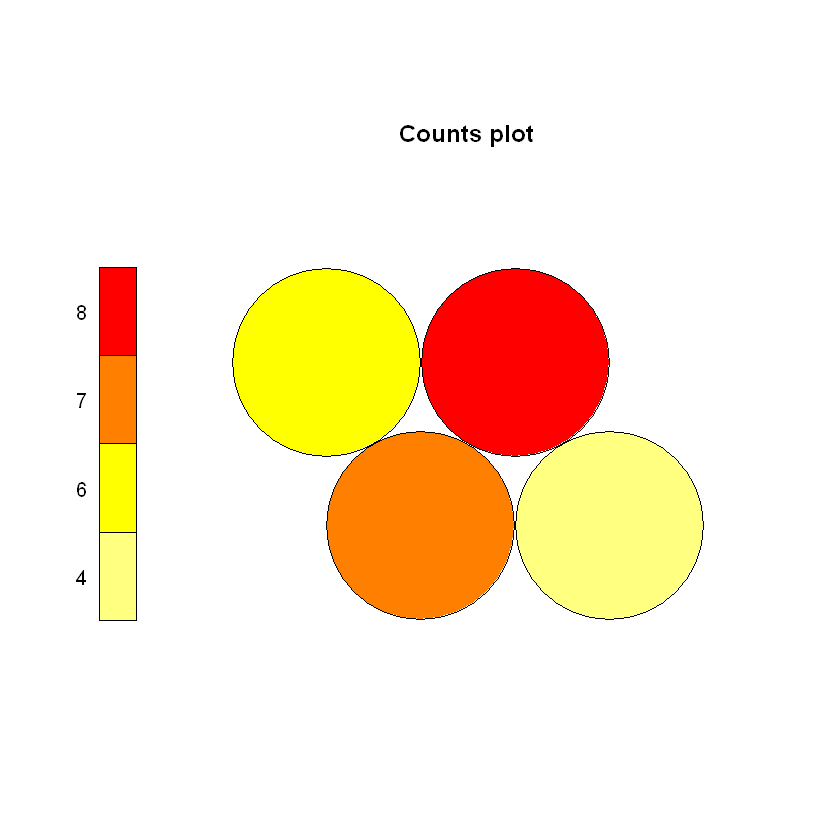

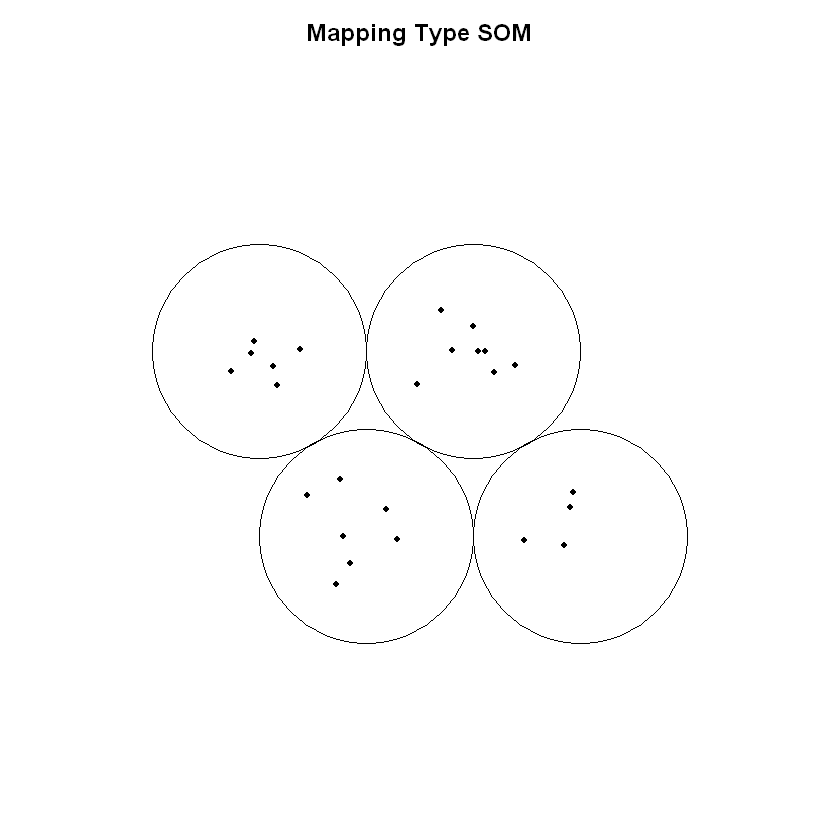

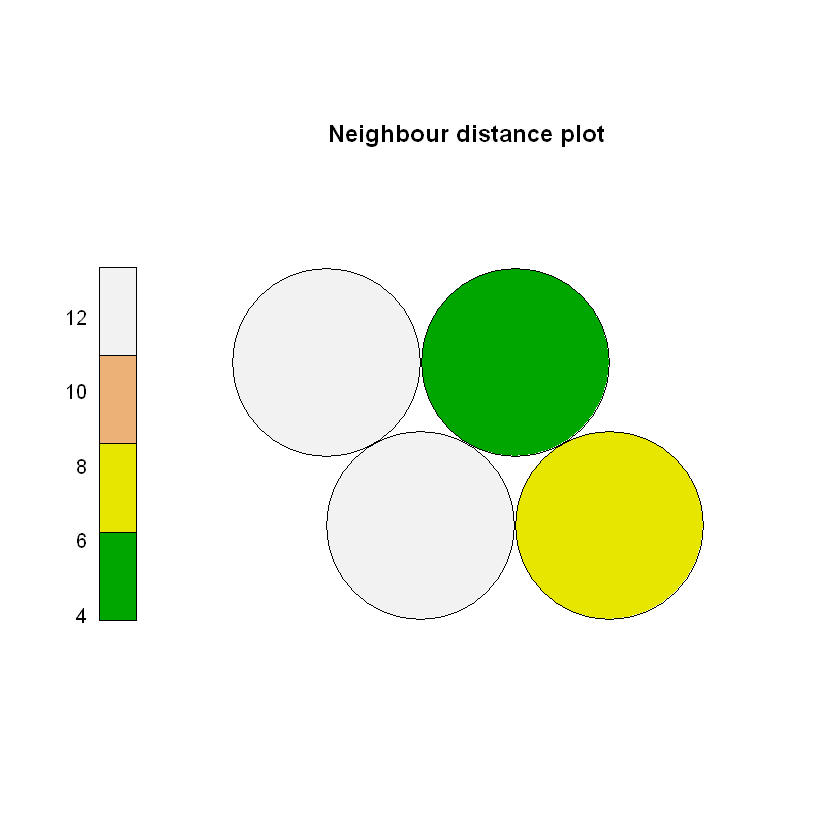

In [25]:
#       1.b
sommapRLEN1 <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"), rlen=1)
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommapRLEN1, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommapRLEN1, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommapRLEN1, type = "dist.neighbours", palette.name = terrain.colors)

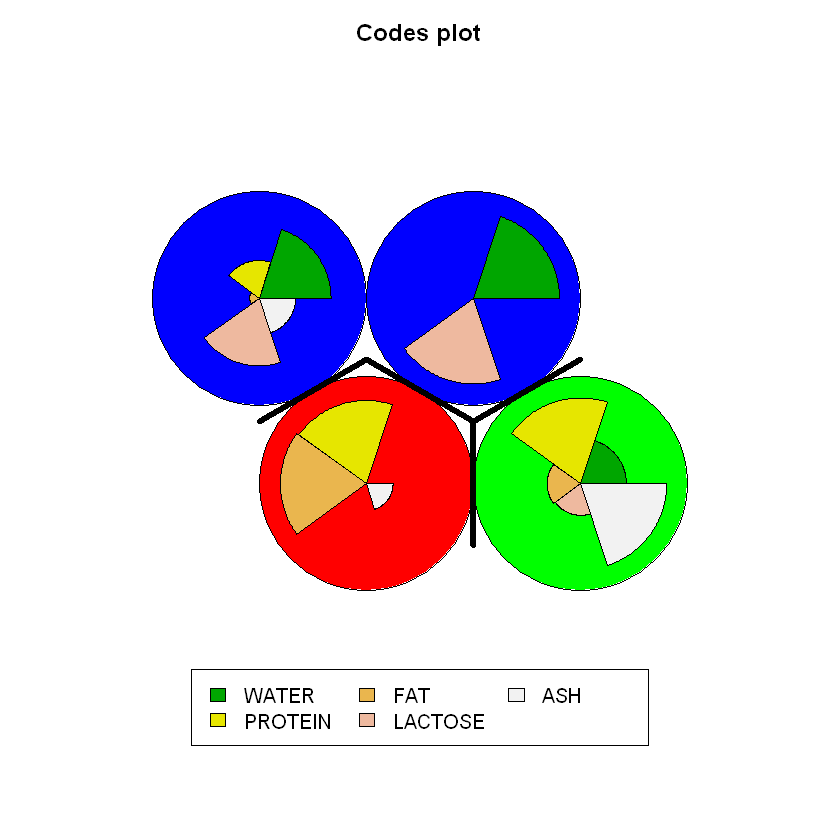

In [26]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: 

a) Explique como funciona esta nueva visualización.

b) Interprete y comente los resultados obtenidos. 

Ejercicio 3: 

a) De los datos en el archivo comunas.csv escoja un subconjunto de datos a los cuales aplicar este algoritmo. Justifique su elección

b) Realice las estimaciones, discuta sus resultados y proponga una estrategia gráfica para representarlos.